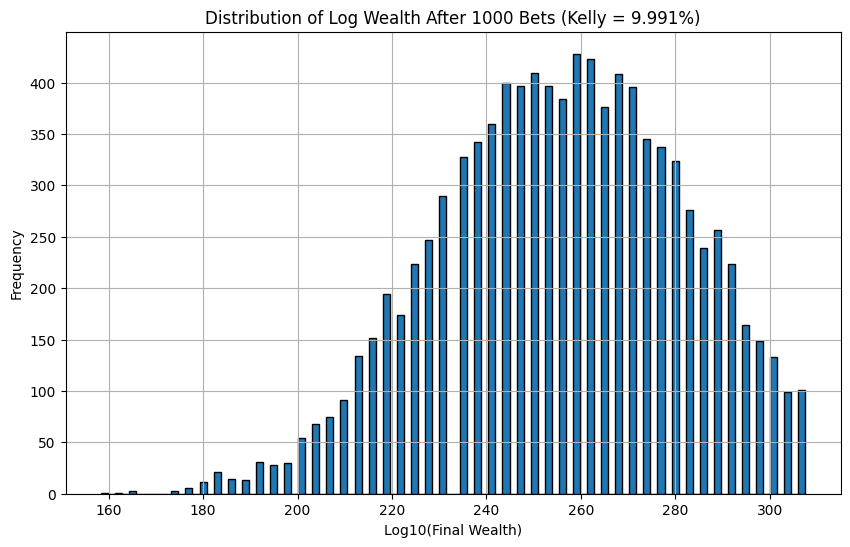

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parameters ---
n_trials = 10000        # Number of simulation runs
n_flips = 1000          # Number of bets per run
p_win = 0.10            # Probability of winning
payout = 10000          # Payout multiplier
f = 0.09991             # Kelly-optimal bet fraction

# --- Simulation ---
final_wealth = []
for _ in range(n_trials):
    wealth = 1.0  # Start with $1
    for _ in range(n_flips):
        if np.random.rand() < p_win:
            wealth *= (1 + f * (payout - 1))  # Win
        else:
            wealth *= (1 - f)  # Lose
    final_wealth.append(wealth)

# --- Clean and log-transform data ---
final_wealth = np.array(final_wealth)
valid_wealth = final_wealth[np.isfinite(final_wealth) & (final_wealth > 0)]
log_wealth = np.log10(valid_wealth)

# --- Plot ---
plt.figure(figsize=(10, 6))
plt.hist(log_wealth, bins=100, edgecolor='black')
plt.title("Distribution of Log Wealth After 1000 Bets (Kelly = 9.991%)")
plt.xlabel("Log10(Final Wealth)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()
